In [ ]:
!nvidia-smi


Fri Nov  5 09:37:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# tf.random.set_seed(1234)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


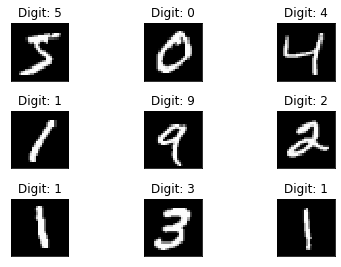

In [13]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

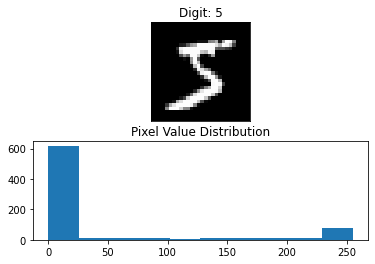

In [14]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[1].reshape(784))
plt.title("Pixel Value Distribution")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


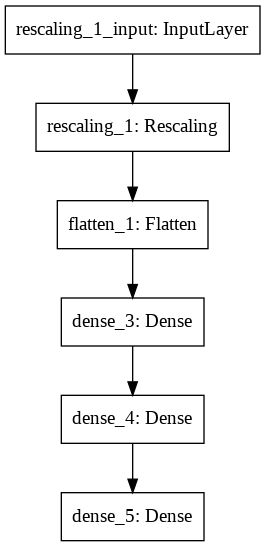

In [11]:
from tensorflow.keras.utils import plot_model

# Build a simpl1e model
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(scale=1.0/255, input_shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
plot_model(model,to_file='multilayer_perceptron_graph.png')


In [12]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10)

Fit on NumPy data
Epoch 1/10
938/938 [==============================] - 6s 3ms/step - loss: 0.2540 - sparse_categorical_accuracy: 0.9254
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1104 - sparse_categorical_accuracy: 0.9666
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9762
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0605 - sparse_categorical_accuracy: 0.9815
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0486 - sparse_categorical_accuracy: 0.9854
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0389 - sparse_categorical_accuracy: 0.9882
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0318 - sparse_categorical_accuracy: 0.9901
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9916
Epoch 9/10
938/938 [==========

In [18]:
#history.history
print(history.history)


{'loss': [0.2539790868759155, 0.11044271290302277, 0.07856053858995438, 0.060520123690366745, 0.04859111085534096, 0.03891830891370773, 0.031781215220689774, 0.026446493342518806, 0.021951107308268547, 0.018425531685352325], 'sparse_categorical_accuracy': [0.92535001039505, 0.9665833115577698, 0.9762333035469055, 0.9815333485603333, 0.9854333400726318, 0.9881500005722046, 0.990149974822998, 0.9916499853134155, 0.9933666586875916, 0.9944000244140625]}


In [21]:
print(history.history['loss'])
print(history.history['sparse_categorical_accuracy'])

[0.2539790868759155, 0.11044271290302277, 0.07856053858995438, 0.060520123690366745, 0.04859111085534096, 0.03891830891370773, 0.031781215220689774, 0.026446493342518806, 0.021951107308268547, 0.018425531685352325]
[0.92535001039505, 0.9665833115577698, 0.9762333035469055, 0.9815333485603333, 0.9854333400726318, 0.9881500005722046, 0.990149974822998, 0.9916499853134155, 0.9933666586875916, 0.9944000244140625]


In [22]:
result = model.evaluate(x_test, y_test, verbose=2)
print(result)

313/313 - 1s - loss: 0.0916 - sparse_categorical_accuracy: 0.9802
[0.09157665073871613, 0.9801999926567078]


In [34]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", np.argmax(predictions, axis=1))


Generate predictions for 3 samples
predictions shape: [7 2 1]


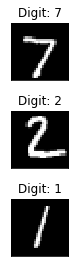

In [36]:
fig = plt.figure()
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.tight_layout()
  plt.imshow(x_test[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(np.argmax(predictions[i])))
  plt.xticks([])
  plt.yticks([])

In [37]:
# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train1 = x_train[:-10000]
y_train1 = y_train[:-10000]

In [38]:
history = model.fit(x_train1, y_train1, batch_size=batch_size, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.0143 - val_sparse_categorical_accuracy: 0.9961
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0133 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.0216 - val_sparse_categorical_accuracy: 0.9934
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9966 - val_loss: 0.0237 - val_sparse_categorical_accuracy: 0.9931
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0098 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.0276 - val_sparse_categorical_accuracy: 0.9925
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0080 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0387 - val_sparse_categorical_accuracy: 0.9924
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0065 - sparse_categorica

In [39]:
#define a method for ploting result
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

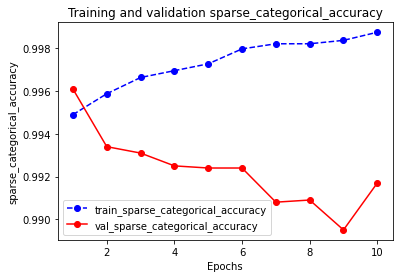

In [40]:
plot_metric(history, 'sparse_categorical_accuracy')